## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 52.3ms	remaining: 52.2s
1:	learn: 0.9301086	total: 56.2ms	remaining: 28s
2:	learn: 0.9005637	total: 63.5ms	remaining: 21.1s
3:	learn: 0.8720983	total: 66.9ms	remaining: 16.6s
4:	learn: 0.8467410	total: 69.9ms	remaining: 13.9s
5:	learn: 0.8226672	total: 72.7ms	remaining: 12s
6:	learn: 0.7994702	total: 75.5ms	remaining: 10.7s
7:	learn: 0.7784272	total: 78.7ms	remaining: 9.76s
8:	learn: 0.7602192	total: 81.6ms	remaining: 8.99s
9:	learn: 0.7412421	total: 84.5ms	remaining: 8.37s
10:	learn: 0.7247930	total: 87.4ms	remaining: 7.86s
11:	learn: 0.7089951	total: 90.1ms	remaining: 7.42s
12:	learn: 0.6951345	total: 92.8ms	remaining: 7.05s
13:	learn: 0.6809276	total: 95.6ms	remaining: 6.73s
14:	learn: 0.6692630	total: 98.8ms	remaining: 6.49s
15:	learn: 0.6588323	total: 102ms	remaining: 6.26s
16:	learn: 0.6472700	total: 105ms	remaining: 6.05s
17:	learn: 0.6379982	total: 108ms	remaining: 5.87s
18:	learn: 0.6294674	total: 111ms	remaining: 5.71s


43:	learn: 0.5116444	total: 188ms	remaining: 4.08s
44:	learn: 0.5100547	total: 193ms	remaining: 4.09s
45:	learn: 0.5069096	total: 196ms	remaining: 4.06s
46:	learn: 0.5051685	total: 199ms	remaining: 4.03s
47:	learn: 0.5033968	total: 202ms	remaining: 4s
48:	learn: 0.5012433	total: 205ms	remaining: 3.97s
49:	learn: 0.4986132	total: 208ms	remaining: 3.95s
50:	learn: 0.4968022	total: 211ms	remaining: 3.92s
51:	learn: 0.4951632	total: 214ms	remaining: 3.9s
52:	learn: 0.4928924	total: 217ms	remaining: 3.87s
53:	learn: 0.4917272	total: 220ms	remaining: 3.85s
54:	learn: 0.4895079	total: 223ms	remaining: 3.83s
55:	learn: 0.4881884	total: 225ms	remaining: 3.8s
56:	learn: 0.4861566	total: 228ms	remaining: 3.78s
57:	learn: 0.4850201	total: 231ms	remaining: 3.76s
58:	learn: 0.4840055	total: 234ms	remaining: 3.74s
59:	learn: 0.4824455	total: 237ms	remaining: 3.72s
60:	learn: 0.4809744	total: 240ms	remaining: 3.7s
61:	learn: 0.4801376	total: 243ms	remaining: 3.68s
62:	learn: 0.4792422	total: 246ms	rem

107:	learn: 0.4447909	total: 381ms	remaining: 3.14s
108:	learn: 0.4440936	total: 384ms	remaining: 3.14s
109:	learn: 0.4435519	total: 387ms	remaining: 3.13s
110:	learn: 0.4431075	total: 390ms	remaining: 3.12s
111:	learn: 0.4425498	total: 392ms	remaining: 3.11s
112:	learn: 0.4419106	total: 395ms	remaining: 3.1s
113:	learn: 0.4414425	total: 399ms	remaining: 3.1s
114:	learn: 0.4407446	total: 402ms	remaining: 3.09s
115:	learn: 0.4402011	total: 404ms	remaining: 3.08s
116:	learn: 0.4398559	total: 407ms	remaining: 3.07s
117:	learn: 0.4392990	total: 410ms	remaining: 3.07s
118:	learn: 0.4389153	total: 413ms	remaining: 3.06s
119:	learn: 0.4383331	total: 416ms	remaining: 3.05s
120:	learn: 0.4378136	total: 419ms	remaining: 3.04s
121:	learn: 0.4375553	total: 422ms	remaining: 3.04s
122:	learn: 0.4369995	total: 425ms	remaining: 3.03s
123:	learn: 0.4366325	total: 428ms	remaining: 3.02s
124:	learn: 0.4362823	total: 430ms	remaining: 3.01s
125:	learn: 0.4359535	total: 433ms	remaining: 3s
126:	learn: 0.435

172:	learn: 0.4153041	total: 573ms	remaining: 2.74s
173:	learn: 0.4148857	total: 576ms	remaining: 2.73s
174:	learn: 0.4144190	total: 579ms	remaining: 2.73s
175:	learn: 0.4140875	total: 582ms	remaining: 2.73s
176:	learn: 0.4136755	total: 585ms	remaining: 2.72s
177:	learn: 0.4133860	total: 588ms	remaining: 2.71s
178:	learn: 0.4129780	total: 591ms	remaining: 2.71s
179:	learn: 0.4122907	total: 600ms	remaining: 2.73s
180:	learn: 0.4119188	total: 603ms	remaining: 2.73s
181:	learn: 0.4115412	total: 606ms	remaining: 2.72s
182:	learn: 0.4112620	total: 608ms	remaining: 2.71s
183:	learn: 0.4107734	total: 611ms	remaining: 2.71s
184:	learn: 0.4104881	total: 614ms	remaining: 2.7s
185:	learn: 0.4100009	total: 617ms	remaining: 2.7s
186:	learn: 0.4096453	total: 619ms	remaining: 2.69s
187:	learn: 0.4093395	total: 622ms	remaining: 2.69s
188:	learn: 0.4090020	total: 625ms	remaining: 2.68s
189:	learn: 0.4085981	total: 633ms	remaining: 2.7s
190:	learn: 0.4082397	total: 635ms	remaining: 2.69s
191:	learn: 0.4

235:	learn: 0.3944181	total: 766ms	remaining: 2.48s
236:	learn: 0.3941497	total: 769ms	remaining: 2.47s
237:	learn: 0.3939819	total: 771ms	remaining: 2.47s
238:	learn: 0.3938322	total: 774ms	remaining: 2.46s
239:	learn: 0.3935463	total: 777ms	remaining: 2.46s
240:	learn: 0.3933166	total: 780ms	remaining: 2.46s
241:	learn: 0.3930992	total: 782ms	remaining: 2.45s
242:	learn: 0.3928898	total: 785ms	remaining: 2.44s
243:	learn: 0.3926199	total: 788ms	remaining: 2.44s
244:	learn: 0.3923955	total: 790ms	remaining: 2.44s
245:	learn: 0.3922312	total: 793ms	remaining: 2.43s
246:	learn: 0.3919499	total: 796ms	remaining: 2.43s
247:	learn: 0.3917420	total: 799ms	remaining: 2.42s
248:	learn: 0.3915186	total: 801ms	remaining: 2.42s
249:	learn: 0.3912759	total: 804ms	remaining: 2.41s
250:	learn: 0.3908375	total: 807ms	remaining: 2.41s
251:	learn: 0.3904815	total: 810ms	remaining: 2.4s
252:	learn: 0.3902127	total: 813ms	remaining: 2.4s
253:	learn: 0.3900274	total: 815ms	remaining: 2.39s
254:	learn: 0.

302:	learn: 0.3789297	total: 957ms	remaining: 2.2s
303:	learn: 0.3787482	total: 960ms	remaining: 2.2s
304:	learn: 0.3786528	total: 963ms	remaining: 2.19s
305:	learn: 0.3784406	total: 966ms	remaining: 2.19s
306:	learn: 0.3782934	total: 969ms	remaining: 2.19s
307:	learn: 0.3781631	total: 972ms	remaining: 2.18s
308:	learn: 0.3779278	total: 975ms	remaining: 2.18s
309:	learn: 0.3777358	total: 978ms	remaining: 2.18s
310:	learn: 0.3775809	total: 981ms	remaining: 2.17s
311:	learn: 0.3774323	total: 984ms	remaining: 2.17s
312:	learn: 0.3772732	total: 987ms	remaining: 2.17s
313:	learn: 0.3771184	total: 989ms	remaining: 2.16s
314:	learn: 0.3769370	total: 992ms	remaining: 2.16s
315:	learn: 0.3766643	total: 995ms	remaining: 2.15s
316:	learn: 0.3764891	total: 998ms	remaining: 2.15s
317:	learn: 0.3762751	total: 1s	remaining: 2.15s
318:	learn: 0.3761284	total: 1s	remaining: 2.14s
319:	learn: 0.3760168	total: 1.01s	remaining: 2.14s
320:	learn: 0.3757763	total: 1.01s	remaining: 2.14s
321:	learn: 0.375607

362:	learn: 0.3682710	total: 1.15s	remaining: 2.01s
363:	learn: 0.3681254	total: 1.15s	remaining: 2.01s
364:	learn: 0.3679761	total: 1.15s	remaining: 2s
365:	learn: 0.3677932	total: 1.15s	remaining: 2s
366:	learn: 0.3676022	total: 1.16s	remaining: 2s
367:	learn: 0.3674148	total: 1.16s	remaining: 1.99s
368:	learn: 0.3673439	total: 1.16s	remaining: 1.99s
369:	learn: 0.3671985	total: 1.17s	remaining: 1.98s
370:	learn: 0.3670563	total: 1.17s	remaining: 1.98s
371:	learn: 0.3669128	total: 1.17s	remaining: 1.98s
372:	learn: 0.3668381	total: 1.17s	remaining: 1.97s
373:	learn: 0.3666564	total: 1.18s	remaining: 1.97s
374:	learn: 0.3663789	total: 1.18s	remaining: 1.97s
375:	learn: 0.3661576	total: 1.18s	remaining: 1.97s
376:	learn: 0.3659742	total: 1.19s	remaining: 1.96s
377:	learn: 0.3658330	total: 1.19s	remaining: 1.96s
378:	learn: 0.3656680	total: 1.2s	remaining: 1.97s
379:	learn: 0.3654606	total: 1.2s	remaining: 1.96s
380:	learn: 0.3651842	total: 1.21s	remaining: 1.96s
381:	learn: 0.3650538	t

423:	learn: 0.3584427	total: 1.33s	remaining: 1.81s
424:	learn: 0.3583044	total: 1.34s	remaining: 1.81s
425:	learn: 0.3581698	total: 1.34s	remaining: 1.81s
426:	learn: 0.3580461	total: 1.34s	remaining: 1.8s
427:	learn: 0.3579182	total: 1.35s	remaining: 1.8s
428:	learn: 0.3577521	total: 1.35s	remaining: 1.8s
429:	learn: 0.3576138	total: 1.35s	remaining: 1.79s
430:	learn: 0.3575528	total: 1.35s	remaining: 1.79s
431:	learn: 0.3574686	total: 1.36s	remaining: 1.78s
432:	learn: 0.3572923	total: 1.36s	remaining: 1.78s
433:	learn: 0.3571859	total: 1.36s	remaining: 1.78s
434:	learn: 0.3570185	total: 1.37s	remaining: 1.77s
435:	learn: 0.3568416	total: 1.37s	remaining: 1.77s
436:	learn: 0.3566846	total: 1.37s	remaining: 1.77s
437:	learn: 0.3565875	total: 1.37s	remaining: 1.76s
438:	learn: 0.3564768	total: 1.38s	remaining: 1.76s
439:	learn: 0.3563559	total: 1.38s	remaining: 1.76s
440:	learn: 0.3561557	total: 1.38s	remaining: 1.75s
441:	learn: 0.3559793	total: 1.39s	remaining: 1.75s
442:	learn: 0.3

491:	learn: 0.3488767	total: 1.53s	remaining: 1.58s
492:	learn: 0.3487285	total: 1.53s	remaining: 1.57s
493:	learn: 0.3486318	total: 1.53s	remaining: 1.57s
494:	learn: 0.3485016	total: 1.54s	remaining: 1.57s
495:	learn: 0.3484072	total: 1.54s	remaining: 1.56s
496:	learn: 0.3482698	total: 1.54s	remaining: 1.56s
497:	learn: 0.3481630	total: 1.54s	remaining: 1.56s
498:	learn: 0.3480855	total: 1.55s	remaining: 1.55s
499:	learn: 0.3478655	total: 1.55s	remaining: 1.55s
500:	learn: 0.3477966	total: 1.55s	remaining: 1.55s
501:	learn: 0.3476142	total: 1.55s	remaining: 1.54s
502:	learn: 0.3474667	total: 1.56s	remaining: 1.54s
503:	learn: 0.3473844	total: 1.56s	remaining: 1.53s
504:	learn: 0.3471852	total: 1.56s	remaining: 1.53s
505:	learn: 0.3471124	total: 1.56s	remaining: 1.53s
506:	learn: 0.3469987	total: 1.57s	remaining: 1.52s
507:	learn: 0.3469000	total: 1.57s	remaining: 1.52s
508:	learn: 0.3467621	total: 1.57s	remaining: 1.52s
509:	learn: 0.3466653	total: 1.58s	remaining: 1.51s
510:	learn: 

554:	learn: 0.3408730	total: 1.72s	remaining: 1.38s
555:	learn: 0.3408310	total: 1.72s	remaining: 1.38s
556:	learn: 0.3407365	total: 1.73s	remaining: 1.37s
557:	learn: 0.3406506	total: 1.73s	remaining: 1.37s
558:	learn: 0.3405352	total: 1.73s	remaining: 1.37s
559:	learn: 0.3404352	total: 1.73s	remaining: 1.36s
560:	learn: 0.3403419	total: 1.74s	remaining: 1.36s
561:	learn: 0.3402836	total: 1.74s	remaining: 1.36s
562:	learn: 0.3402264	total: 1.74s	remaining: 1.35s
563:	learn: 0.3400466	total: 1.75s	remaining: 1.35s
564:	learn: 0.3399235	total: 1.75s	remaining: 1.34s
565:	learn: 0.3398064	total: 1.75s	remaining: 1.34s
566:	learn: 0.3396466	total: 1.75s	remaining: 1.34s
567:	learn: 0.3395531	total: 1.76s	remaining: 1.34s
568:	learn: 0.3394093	total: 1.76s	remaining: 1.33s
569:	learn: 0.3393241	total: 1.76s	remaining: 1.33s
570:	learn: 0.3392368	total: 1.76s	remaining: 1.33s
571:	learn: 0.3391373	total: 1.77s	remaining: 1.32s
572:	learn: 0.3390261	total: 1.77s	remaining: 1.32s
573:	learn: 

621:	learn: 0.3342275	total: 1.91s	remaining: 1.16s
622:	learn: 0.3341456	total: 1.92s	remaining: 1.16s
623:	learn: 0.3340640	total: 1.92s	remaining: 1.16s
624:	learn: 0.3339122	total: 1.92s	remaining: 1.15s
625:	learn: 0.3337503	total: 1.93s	remaining: 1.15s
626:	learn: 0.3336593	total: 1.93s	remaining: 1.15s
627:	learn: 0.3335713	total: 1.93s	remaining: 1.14s
628:	learn: 0.3333915	total: 1.93s	remaining: 1.14s
629:	learn: 0.3333158	total: 1.94s	remaining: 1.14s
630:	learn: 0.3332088	total: 1.94s	remaining: 1.13s
631:	learn: 0.3331129	total: 1.94s	remaining: 1.13s
632:	learn: 0.3330288	total: 1.95s	remaining: 1.13s
633:	learn: 0.3328844	total: 1.95s	remaining: 1.12s
634:	learn: 0.3328544	total: 1.95s	remaining: 1.12s
635:	learn: 0.3327021	total: 1.95s	remaining: 1.12s
636:	learn: 0.3326462	total: 1.96s	remaining: 1.11s
637:	learn: 0.3325758	total: 1.96s	remaining: 1.11s
638:	learn: 0.3324324	total: 1.96s	remaining: 1.11s
639:	learn: 0.3323174	total: 1.97s	remaining: 1.1s
640:	learn: 0

687:	learn: 0.3276684	total: 2.1s	remaining: 954ms
688:	learn: 0.3275537	total: 2.11s	remaining: 951ms
689:	learn: 0.3274808	total: 2.11s	remaining: 948ms
690:	learn: 0.3273839	total: 2.11s	remaining: 945ms
691:	learn: 0.3272773	total: 2.12s	remaining: 942ms
692:	learn: 0.3272088	total: 2.12s	remaining: 939ms
693:	learn: 0.3271216	total: 2.12s	remaining: 936ms
694:	learn: 0.3270566	total: 2.13s	remaining: 933ms
695:	learn: 0.3269516	total: 2.13s	remaining: 929ms
696:	learn: 0.3267980	total: 2.13s	remaining: 926ms
697:	learn: 0.3266887	total: 2.13s	remaining: 923ms
698:	learn: 0.3265888	total: 2.14s	remaining: 920ms
699:	learn: 0.3265229	total: 2.14s	remaining: 917ms
700:	learn: 0.3264350	total: 2.14s	remaining: 914ms
701:	learn: 0.3263223	total: 2.15s	remaining: 911ms
702:	learn: 0.3262539	total: 2.15s	remaining: 908ms
703:	learn: 0.3261258	total: 2.15s	remaining: 905ms
704:	learn: 0.3260520	total: 2.15s	remaining: 902ms
705:	learn: 0.3259475	total: 2.16s	remaining: 898ms
706:	learn: 0

750:	learn: 0.3220746	total: 2.29s	remaining: 761ms
751:	learn: 0.3219897	total: 2.3s	remaining: 758ms
752:	learn: 0.3218990	total: 2.3s	remaining: 755ms
753:	learn: 0.3218179	total: 2.3s	remaining: 752ms
754:	learn: 0.3217323	total: 2.31s	remaining: 748ms
755:	learn: 0.3216617	total: 2.31s	remaining: 745ms
756:	learn: 0.3216090	total: 2.31s	remaining: 742ms
757:	learn: 0.3215306	total: 2.31s	remaining: 739ms
758:	learn: 0.3214274	total: 2.32s	remaining: 736ms
759:	learn: 0.3212014	total: 2.32s	remaining: 733ms
760:	learn: 0.3211190	total: 2.32s	remaining: 730ms
761:	learn: 0.3210312	total: 2.33s	remaining: 727ms
762:	learn: 0.3209495	total: 2.33s	remaining: 724ms
763:	learn: 0.3208564	total: 2.33s	remaining: 721ms
764:	learn: 0.3207911	total: 2.34s	remaining: 718ms
765:	learn: 0.3206643	total: 2.34s	remaining: 715ms
766:	learn: 0.3205891	total: 2.34s	remaining: 711ms
767:	learn: 0.3204765	total: 2.34s	remaining: 708ms
768:	learn: 0.3203840	total: 2.35s	remaining: 705ms
769:	learn: 0.3

818:	learn: 0.3161739	total: 2.49s	remaining: 550ms
819:	learn: 0.3160986	total: 2.49s	remaining: 547ms
820:	learn: 0.3159951	total: 2.49s	remaining: 544ms
821:	learn: 0.3159403	total: 2.5s	remaining: 541ms
822:	learn: 0.3158160	total: 2.5s	remaining: 538ms
823:	learn: 0.3157523	total: 2.5s	remaining: 534ms
824:	learn: 0.3156673	total: 2.5s	remaining: 531ms
825:	learn: 0.3156288	total: 2.51s	remaining: 528ms
826:	learn: 0.3155257	total: 2.51s	remaining: 525ms
827:	learn: 0.3154546	total: 2.51s	remaining: 522ms
828:	learn: 0.3153664	total: 2.52s	remaining: 519ms
829:	learn: 0.3152896	total: 2.52s	remaining: 516ms
830:	learn: 0.3152050	total: 2.52s	remaining: 513ms
831:	learn: 0.3151385	total: 2.52s	remaining: 510ms
832:	learn: 0.3150922	total: 2.53s	remaining: 508ms
833:	learn: 0.3149588	total: 2.54s	remaining: 505ms
834:	learn: 0.3149074	total: 2.54s	remaining: 502ms
835:	learn: 0.3148291	total: 2.54s	remaining: 498ms
836:	learn: 0.3147707	total: 2.54s	remaining: 495ms
837:	learn: 0.31

878:	learn: 0.3115190	total: 2.68s	remaining: 369ms
879:	learn: 0.3114687	total: 2.68s	remaining: 365ms
880:	learn: 0.3113934	total: 2.68s	remaining: 362ms
881:	learn: 0.3113378	total: 2.69s	remaining: 359ms
882:	learn: 0.3112367	total: 2.69s	remaining: 356ms
883:	learn: 0.3111915	total: 2.69s	remaining: 353ms
884:	learn: 0.3111075	total: 2.69s	remaining: 350ms
885:	learn: 0.3110486	total: 2.7s	remaining: 347ms
886:	learn: 0.3109334	total: 2.7s	remaining: 344ms
887:	learn: 0.3108347	total: 2.7s	remaining: 341ms
888:	learn: 0.3107647	total: 2.7s	remaining: 338ms
889:	learn: 0.3107302	total: 2.71s	remaining: 335ms
890:	learn: 0.3106509	total: 2.71s	remaining: 331ms
891:	learn: 0.3106139	total: 2.71s	remaining: 328ms
892:	learn: 0.3105421	total: 2.71s	remaining: 325ms
893:	learn: 0.3104659	total: 2.72s	remaining: 322ms
894:	learn: 0.3104028	total: 2.72s	remaining: 319ms
895:	learn: 0.3103186	total: 2.72s	remaining: 316ms
896:	learn: 0.3102488	total: 2.73s	remaining: 313ms
897:	learn: 0.31

943:	learn: 0.3069525	total: 2.87s	remaining: 170ms
944:	learn: 0.3068968	total: 2.87s	remaining: 167ms
945:	learn: 0.3068564	total: 2.87s	remaining: 164ms
946:	learn: 0.3067279	total: 2.88s	remaining: 161ms
947:	learn: 0.3066517	total: 2.88s	remaining: 158ms
948:	learn: 0.3066014	total: 2.88s	remaining: 155ms
949:	learn: 0.3065250	total: 2.88s	remaining: 152ms
950:	learn: 0.3064465	total: 2.89s	remaining: 149ms
951:	learn: 0.3063837	total: 2.89s	remaining: 146ms
952:	learn: 0.3063292	total: 2.89s	remaining: 143ms
953:	learn: 0.3062107	total: 2.9s	remaining: 140ms
954:	learn: 0.3061348	total: 2.9s	remaining: 137ms
955:	learn: 0.3060576	total: 2.9s	remaining: 134ms
956:	learn: 0.3059772	total: 2.9s	remaining: 131ms
957:	learn: 0.3058989	total: 2.91s	remaining: 127ms
958:	learn: 0.3057985	total: 2.91s	remaining: 124ms
959:	learn: 0.3056692	total: 2.91s	remaining: 121ms
960:	learn: 0.3055777	total: 2.92s	remaining: 118ms
961:	learn: 0.3054462	total: 2.92s	remaining: 115ms
962:	learn: 0.30

# ABC - GAN Model with skip connection

In [10]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.1, betas=(0.5, 0.999))


In [11]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [12]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
1.0864949369045684


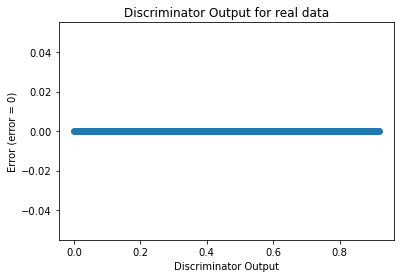

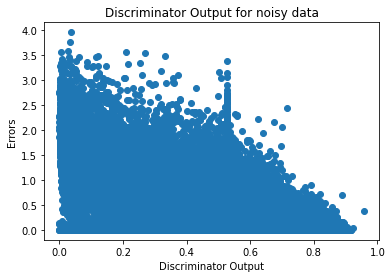

In [13]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [14]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], device='cuda:0', requires_grad=True)
